

# Project: Investigate a No-Show Appointment  Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The recent raise in health related issues has made it fundamental that everyone one has easy access to health care but its been discoved that despite provision of access patient may or may not show up for their appointments leading to hospital incuring losses on operating cost as salaries will be paid wether or not patient visit the hospitals as expected.  This report tries to analyse the reason why patients dont show up for their appointments after scheduling one and providing possible solutions the hospitals can consider in improvoing their revenue.

Dataset used for this project was collected from [Kaggle]('https://www.kaggle.com/datasets/joniarroba/noshowappointments') the dataset contains 110k medical appointments in Brazil, collected in May/June 2016 and its focused on characteristics of patients as well as their presence or absence from scheduled medical appointments. The dataset is made up of 14 unique variables.

Variables in this dataset includes(PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism, Handcap, SMS_received,Neighbourhood,Scholarship and No-show ). This analysis will be done using the No-show variable as our dependent variable while other variables will be used as independent varaibles. 

Identifying factors responsible to no-show will definitely help Hospital better determine types of scheduled appointments to plan for and provide incentives that enables patient show up for their appointments.
This analysis wont be using inferential statistics or machine learning so all findings are tentative.

This Project will be providing insights into the following qustions:
1. What percentage of people showed up compared to those that didnt?
2. Why Are People Not Showing Up?
3. Does scholarship affect patient ability to show up?
4. Does SMS alert impacts patient availability for their appointment?
5. Is there any relationship between distance from patient neighbourhood to the hospital and their showing up for appointments?
6. whats the time difference between a patient schedule date and his appointment date. What impact does this have on the patient ability to show up? 
7. Is there any relationship between patient age and their ability to show up?
8. Does gender play any role in patient missing their appointment?




### Import all relevant libraries

In [1]:
##Data Analysis
import pandas as pd
import numpy as np

##Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
##Identify current directory for your files
import os
os.getcwd()

'/Users/mac/Downloads'

## Data Wrangling

### General Properties 

In [3]:
df = pd.read_csv('/Users/mac/Downloads/KaggleV2-May-2016.csv')
df.head() ##inspect few columns that makes up the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info() ###get information on characteristices of each attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
###check data for missing variables
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing variables in each columns

In [6]:
##check number of unique characters
df.nunique().sum()

276606

In [7]:
##check number of duplicates
sum(df.duplicated())

0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

## Prepare the data and identify irregularities

### DATA CLEANING AND MANIPULATION

In [8]:
df.dtypes ###check the data type of each attributes and see that it's in the correct format.

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

AppointmentID, PatientID, scheduledDay, AppointmentDay are not in the right format we need to format their data types.

In [9]:
to_date =['AppointmentDay','ScheduledDay']
for data in to_date:
    df[data] = df[data].apply(pd.to_datetime).dt.date
    df[data] =df[data].apply(pd.to_datetime)
 

In [10]:
to_str = ['PatientId','AppointmentID']
for string in to_str:
    df[string] = df[string].astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

In [12]:
###check statistical properties of all numeric variables.

df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Age variables has a minimium value of -1 which is an annormally. Drop that roll. Every other columns looks sensible.

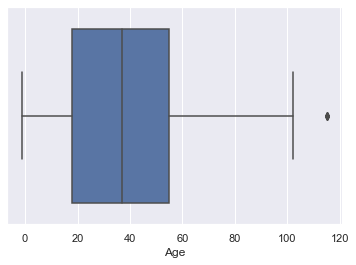

In [13]:


sns.boxplot(x='Age',data = df);

In [14]:
##115 is the oldest age and is realistic according to human existence.
def outlier(df,age):
    q1 = df['Age'].quantile(0.25)
    q3 = df['Age'].quantile(0.75)
    IQR = q3-q1
    df = df.loc[~((df['Age'] < (q1 -1.5 * IQR))| (df['Age'] < (q3 +1.5 * IQR))),]
    return df
outlier(df,'Age')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,31963211613981.0,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981.0,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981.0,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981.0,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724.0,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [15]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
df.drop(df.query('Age == -1').index, inplace = True)

In [17]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

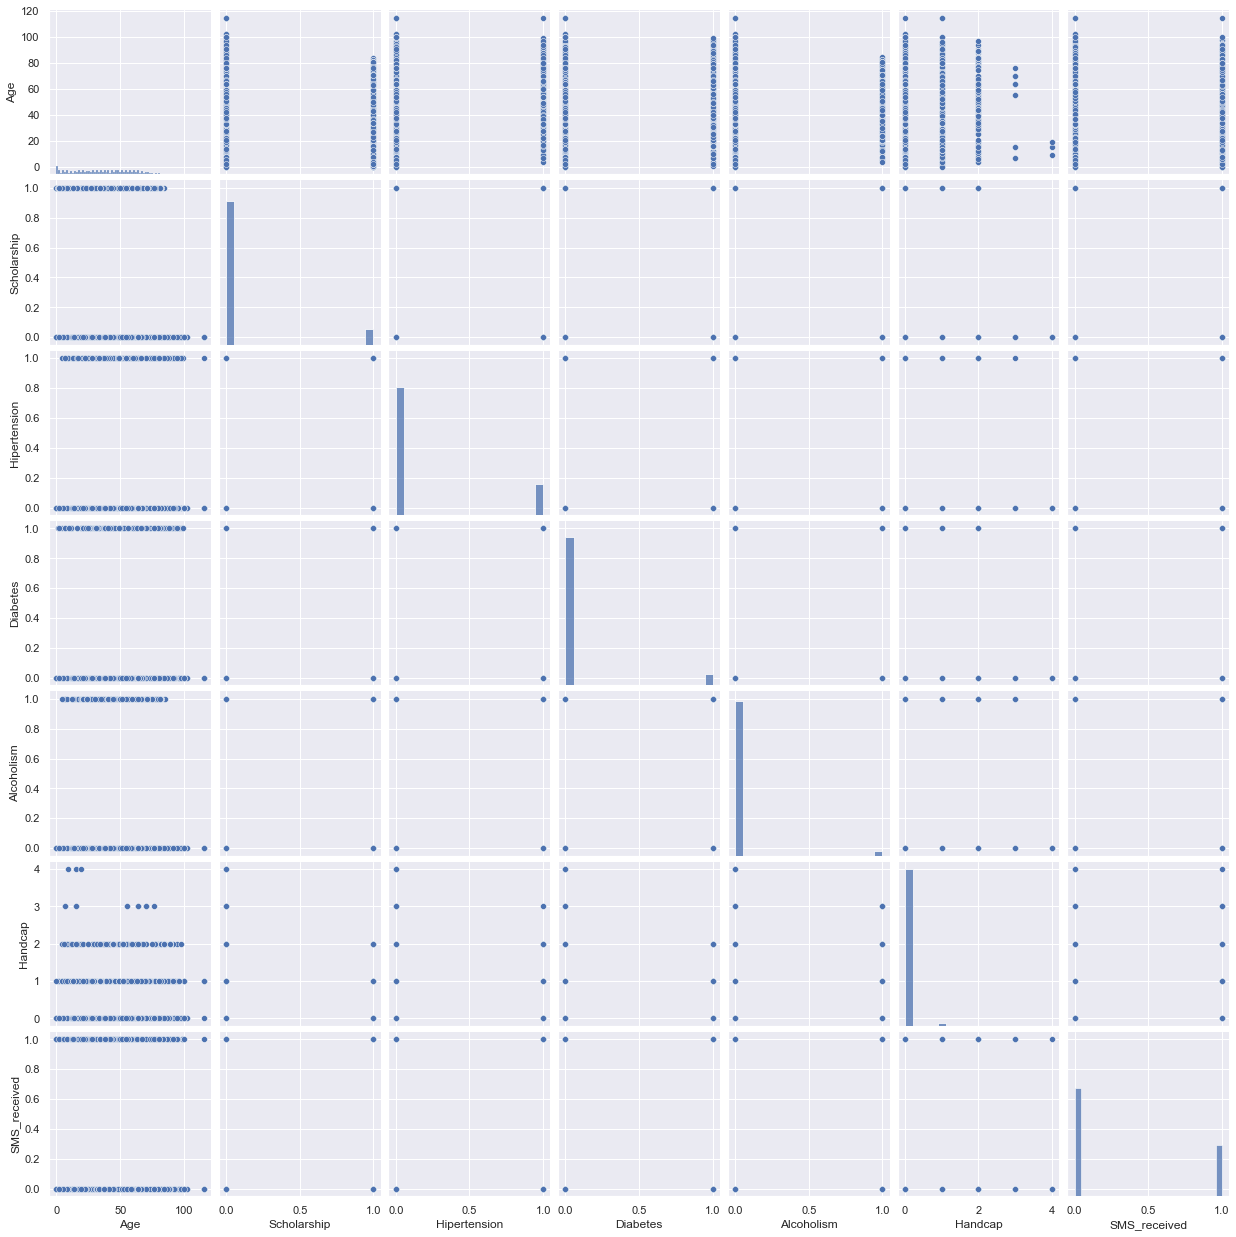

In [18]:
sns.pairplot(df)

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: What percentage of people showed up compared to those that didnt?

In [19]:
df['No-show'].value_counts()


No     88207
Yes    22319
Name: No-show, dtype: int64

From the data dictionary it was explained that the No-show column represent data with "No" if patient was present for their appointment amd "Yes" if they were absent.

Text(0, 0.5, 'Show-Up Distribution ')

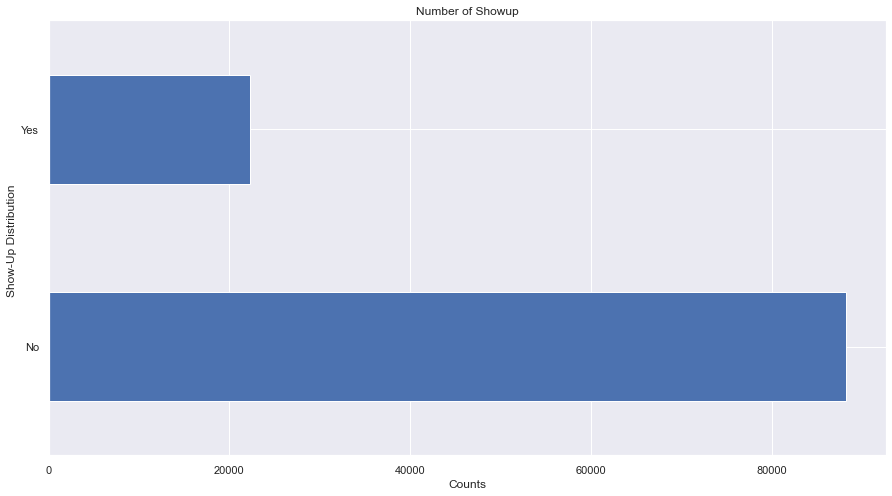

In [20]:
### We need to check what percentage showed up and what percentage didnt?
counts  = df['No-show'].value_counts()
counts.plot(kind = 'barh',figsize = (15,8))
plt.title('Number of Showup')
plt.xlabel('Counts')
plt.ylabel('Show-Up Distribution ')


In [21]:
def percent(value):
    percent = round(df[value].value_counts()/len(df)*100)
    return percent

Text(0.5, 1.0, 'Show Up Percent')

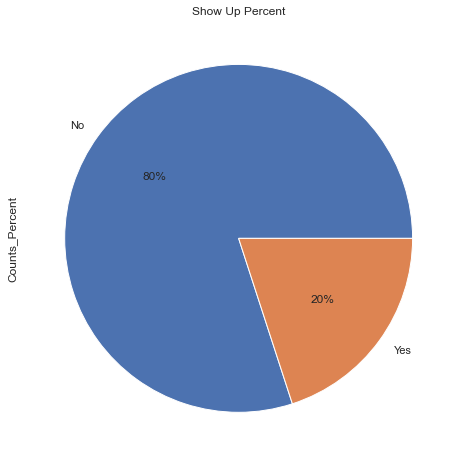

In [22]:
value = percent('No-show')

value.plot(kind = 'pie',labels = ['No','Yes'], autopct = '%1.0f%%', figsize = (15,8))
plt.ylabel('Counts_Percent')
plt.title("Show Up Percent")

We noticed 20% of People dont show up, further investigation needs to be done to understand why they dont show up.

## Question 2: Why Are People Not Showing Up?

We need to analyze how each individual variable affects peoples ability to show up

### Does scholarship affect patient ability to show up?

In [23]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [24]:
percent('Scholarship')

0    90.0
1    10.0
Name: Scholarship, dtype: float64

In [25]:
def val(variable):
    dd = df[variable].value_counts()
    df1 = dd.plot(kind = 'bar', figsize = (12,8))
    plt.title("Count of Free Medicals")
    plt.ylabel("Counts")
    plt.xlabel("{}".format(variable))
    return df1

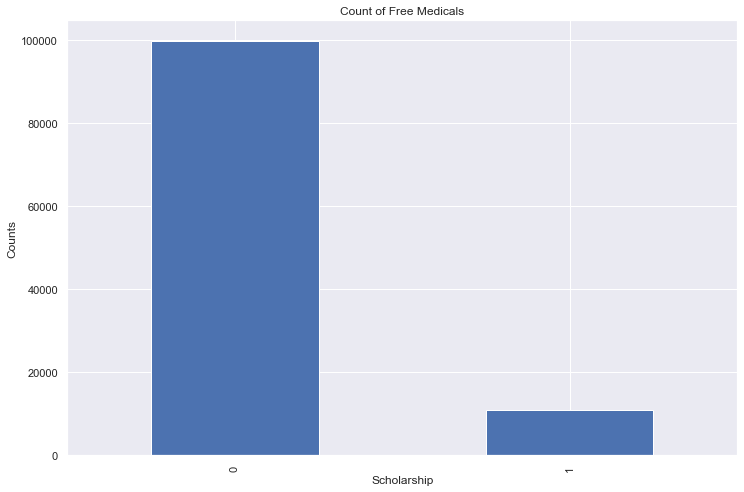

In [26]:
val('Scholarship');

The graph above shows that only a few patient has access to scholarship. This scholarship is a concession given by the Brazilian govt to poor Families to enable them get access to medicare. We need to further analyse what percentage of patients got this scholarship and if it played any role in their availability for their appointments. 

Text(0.5, 1.0, 'Scholarship Distribution by Patients')

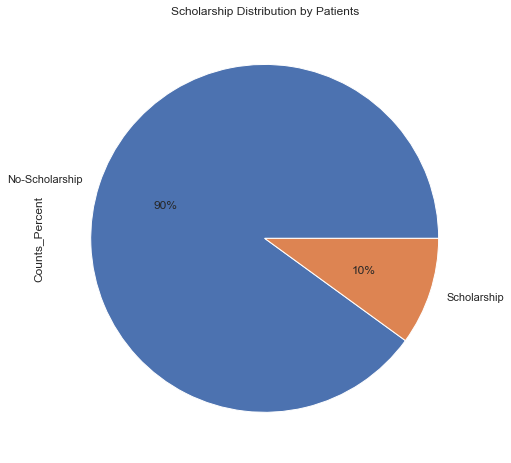

In [27]:
value = percent('Scholarship')
value.plot(kind = 'pie',labels = ['No-Scholarship','Scholarship'], autopct = '%1.0f%%', figsize = (15,8))
plt.ylabel('Counts_Percent')
plt.title("Scholarship Distribution by Patients")

In [28]:
df1 = df.groupby('Scholarship')['No-show'].value_counts().unstack()
df1

No-show,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


In [30]:
Scholarship_percents= round(df.groupby('Scholarship')['No-show'].value_counts()/len(df['Scholarship'])*100).unstack()
Scholarship_percents

No-show,No,Yes
Scholarship,,
0,72.0,18.0
1,7.0,2.0


Text(0.5, 0, 'Count')

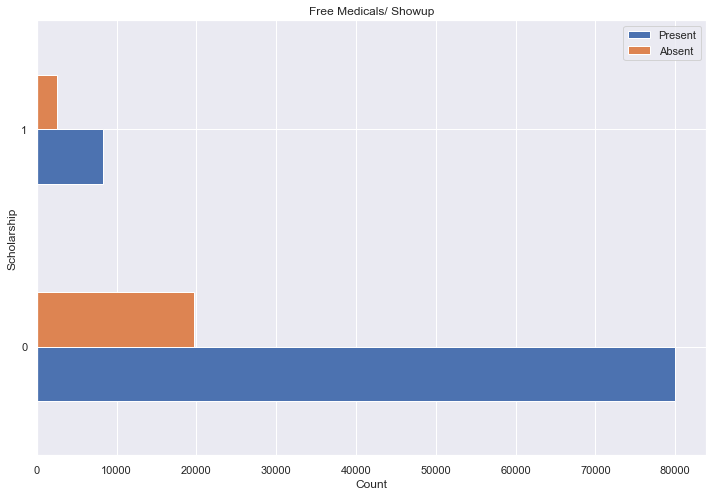

In [31]:
df1 = df.groupby('Scholarship')['No-show'].value_counts().unstack()
df1.plot(kind = 'barh', figsize = (12,8))
plt.title("Free Medicals/ Showup")
plt.legend(['Present','Absent'])
plt.ylabel("Scholarship")
plt.xlabel("Count")

From the chart above we can deduce that free medicals has little to no impact on if patient shows up or not.Only 10% of the patient got access to scholarships and of this group only 2% showed up. It's even more evident that patient without scholarship show up more.This means medicals cost isnt a major factor that determines patient show up.

### Does SMS alert impacts patient availability for their appointment?

In [32]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [33]:
percent('SMS_received')

0    68.0
1    32.0
Name: SMS_received, dtype: float64

In [34]:
df1 = df.groupby('SMS_received')['No-show'].value_counts().unstack()
df1

No-show,No,Yes
SMS_received,,
0,62509,12535
1,25698,9784


In [35]:
Reminders_percent= round(df.groupby('SMS_received')['No-show'].value_counts()/len(df['SMS_received'])*100).unstack()
Reminders_percent

No-show,No,Yes
SMS_received,,
0,57.0,11.0
1,23.0,9.0


Text(0.5, 0, 'Count')

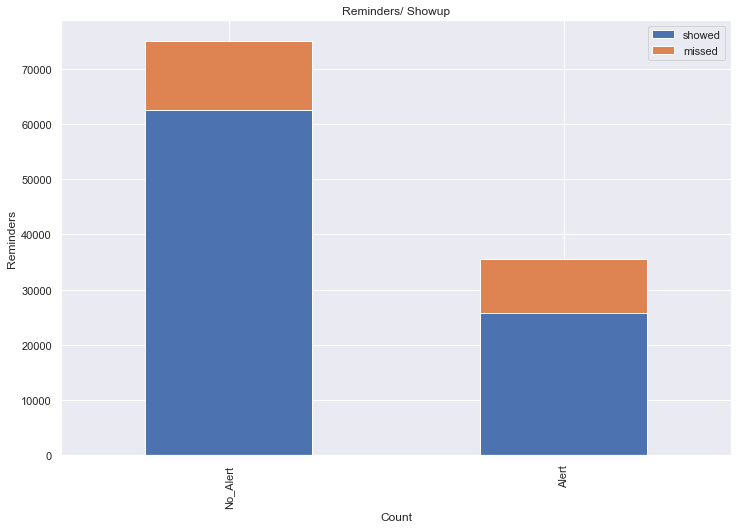

In [36]:
df1 = df.groupby('SMS_received')['No-show'].value_counts().unstack()
df1.index = ['No_Alert','Alert']
df1.plot(kind = 'bar', figsize = (12,8), stacked = True)
plt.title("Reminders/ Showup")
plt.legend(["showed","missed"])
plt.ylabel("Reminders")
plt.xlabel("Count")

32% of patients got sms once but only 9% of this group showed up. This shows sms alert has no impact on patient show up, so therefore the hospital might need to look for another means of sending client reminders or increase the numbers of sms alert as patient currently gets only one reminder which can be easily missed.

### Is there any relationship between distance from patient neighbourhood to the hospital and their showing up for appointments?

In [37]:
df['Neighbourhood'].nunique()

81

<AxesSubplot:>

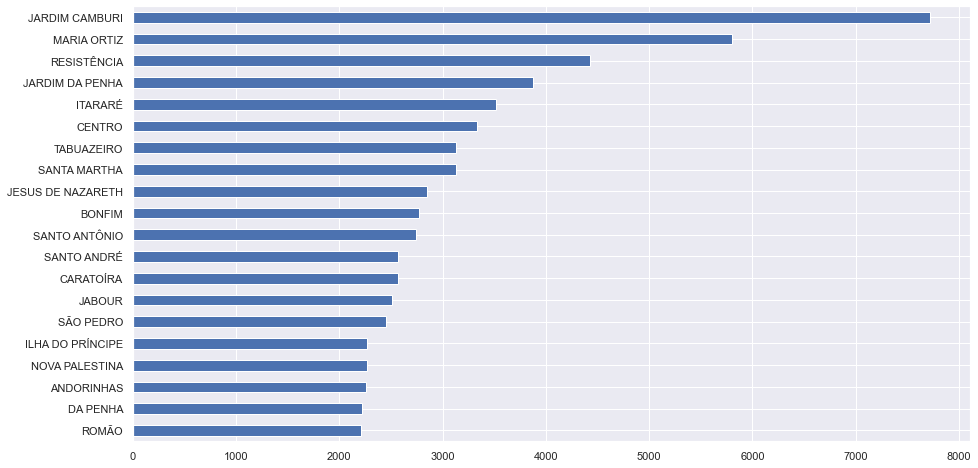

In [38]:
df['Neighbourhood'].value_counts().head(20).sort_values().plot(kind = 'barh',figsize = (15,8))

<AxesSubplot:>

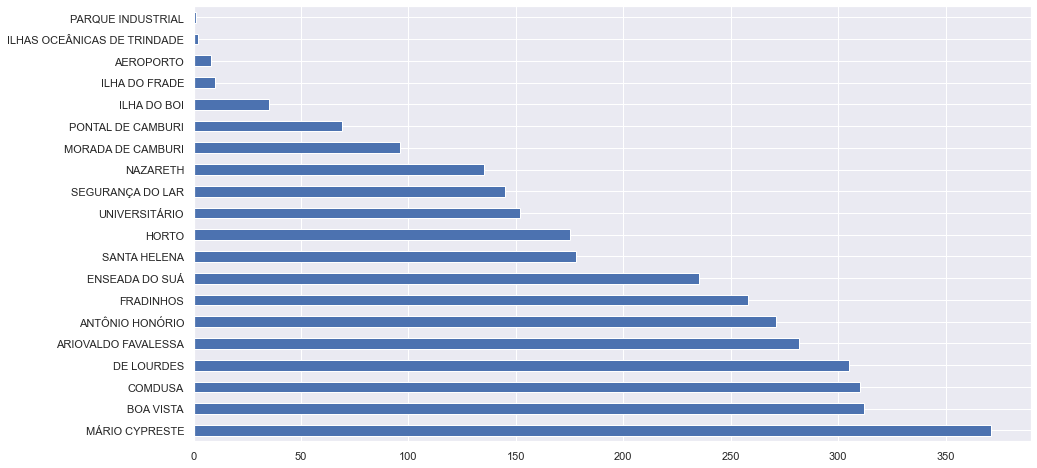

In [39]:
df['Neighbourhood'].value_counts().tail(20).plot(kind = 'barh',figsize = (15,8))

In [40]:
percent('Neighbourhood')

JARDIM CAMBURI                 7.0
MARIA ORTIZ                    5.0
RESISTÊNCIA                    4.0
JARDIM DA PENHA                4.0
ITARARÉ                        3.0
                              ... 
ILHA DO BOI                    0.0
ILHA DO FRADE                  0.0
AEROPORTO                      0.0
ILHAS OCEÂNICAS DE TRINDADE    0.0
PARQUE INDUSTRIAL              0.0
Name: Neighbourhood, Length: 81, dtype: float64

In [41]:
df1 = df.groupby('Neighbourhood')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1

No-show,No,Yes
Neighbourhood,,
JARDIM CAMBURI,6252.0,1465.0
MARIA ORTIZ,4586.0,1219.0
RESISTÊNCIA,3525.0,906.0
JARDIM DA PENHA,3246.0,631.0
SANTA MARTHA,2635.0,496.0
...,...,...
ILHA DO BOI,32.0,3.0
ILHA DO FRADE,8.0,2.0
AEROPORTO,7.0,1.0


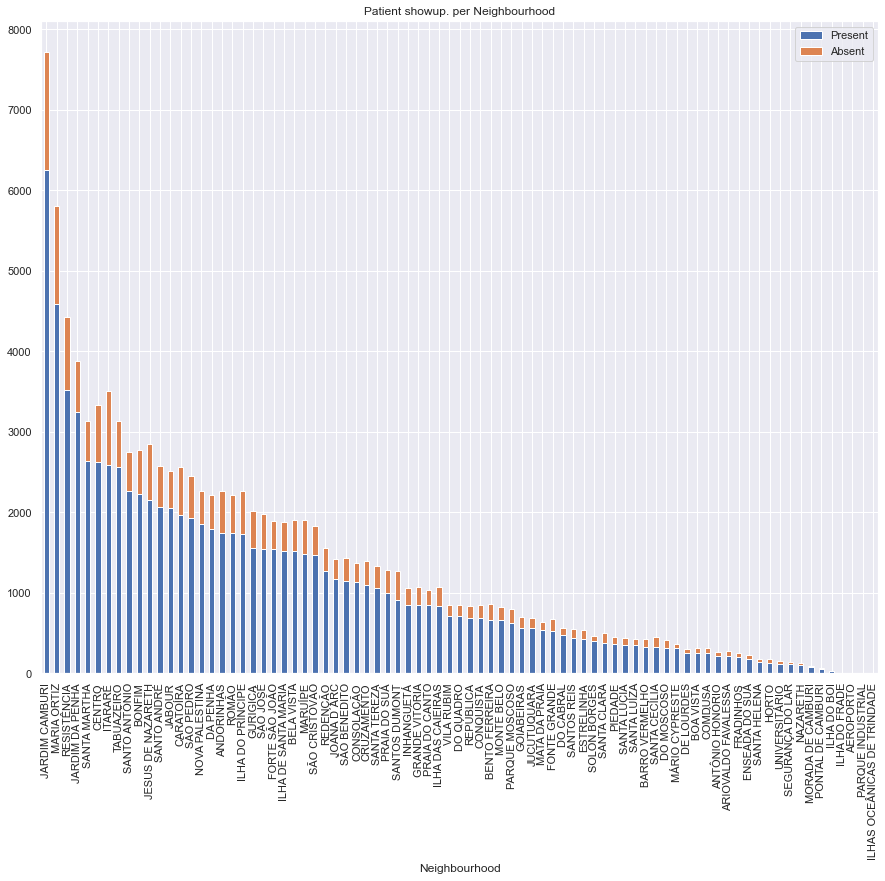

In [42]:
df1 = df.groupby('Neighbourhood')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1.plot(kind = 'bar', stacked = True, figsize = (15,12))
plt.title('Patient showup. per Neighbourhood')
plt.legend(['Present','Absent'])

7% of patients comes from JARDIM CAMBURI and they have the highest show up rate also. More resources is needed to determine the proximity between each neighbourhood and the health care facility. there is no clear relationship between patient Neighbourhood and wether or not they will show up.

### whats the time difference between a patient schedule date and his appointment date. What impact does this have on the patient ability to show up?

Text(0.5, 1.0, 'Appointment Date for Client Visit')

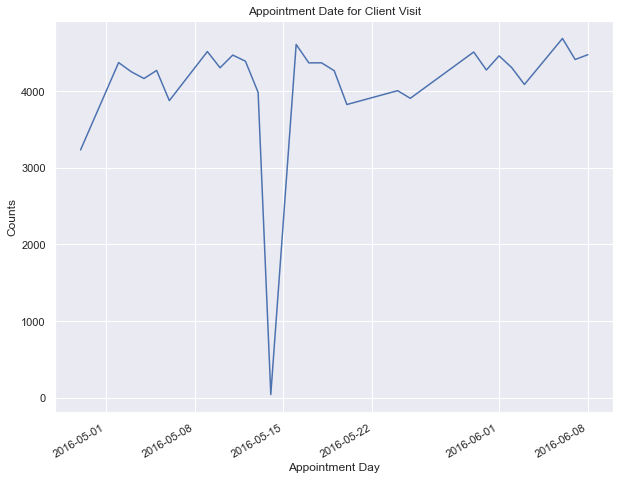

In [43]:
df['AppointmentDay'].value_counts().plot(figsize = (10,8))
plt.xlabel('Appointment Day')
plt.ylabel('Counts')
plt.title('Appointment Date for Client Visit')

In [44]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
df1 = df.groupby('AppointmentDay')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1.head()

No-show,No,Yes
AppointmentDay,,
2016-06-06,3818,873
2016-06-08,3705,774
2016-06-01,3652,812
2016-05-30,3626,888
2016-06-07,3600,816


Text(0, 0.5, 'Count')

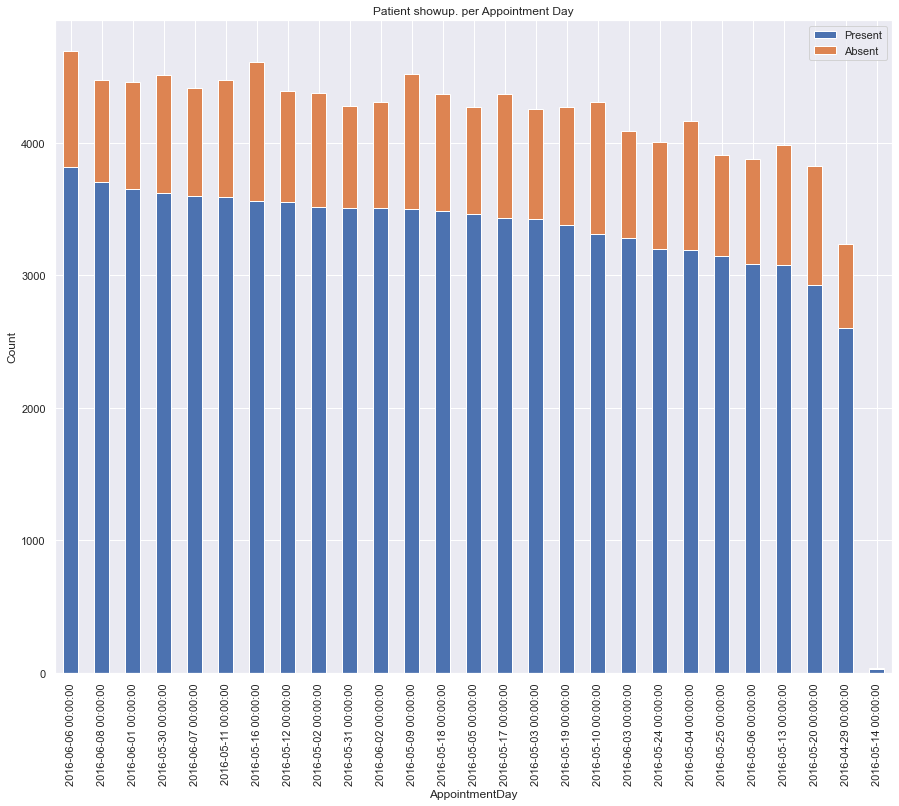

In [47]:
df1.plot(kind = 'bar',  stacked = True, figsize = (15,12))
plt.title('Patient showup. per Appointment Day')
plt.legend(['Present','Absent'])
plt.ylabel('Count')

In [48]:
df['ScheduledDay'].value_counts()

2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64

Text(0.5, 1.0, 'Client Scheduled Day')

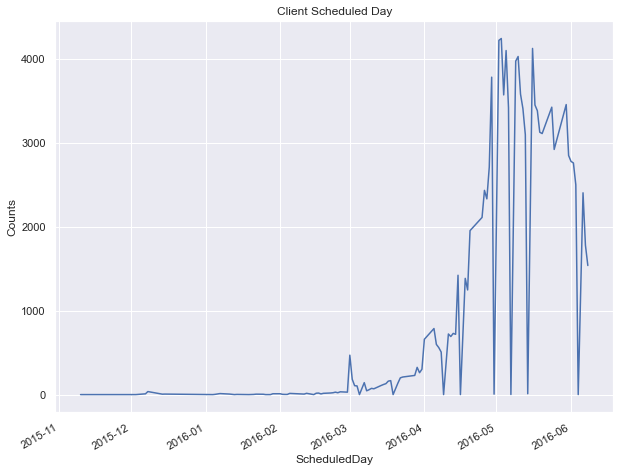

In [49]:
df['ScheduledDay'].value_counts().plot(figsize = (10,8))
plt.xlabel('ScheduledDay')
plt.ylabel('Counts')
plt.title('Client Scheduled Day')

In [50]:
df1 = df.groupby('ScheduledDay')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1

No-show,No,Yes
ScheduledDay,,
2016-05-02,3417.0,799.0
2016-05-16,3409.0,711.0
2016-05-03,3345.0,893.0
2016-05-05,3341.0,754.0
2016-05-10,3318.0,706.0
...,...,...
2016-04-09,1.0,NaN
2015-11-10,1.0,NaN
2015-12-03,NaN,1.0


Text(0, 0.5, 'Count')

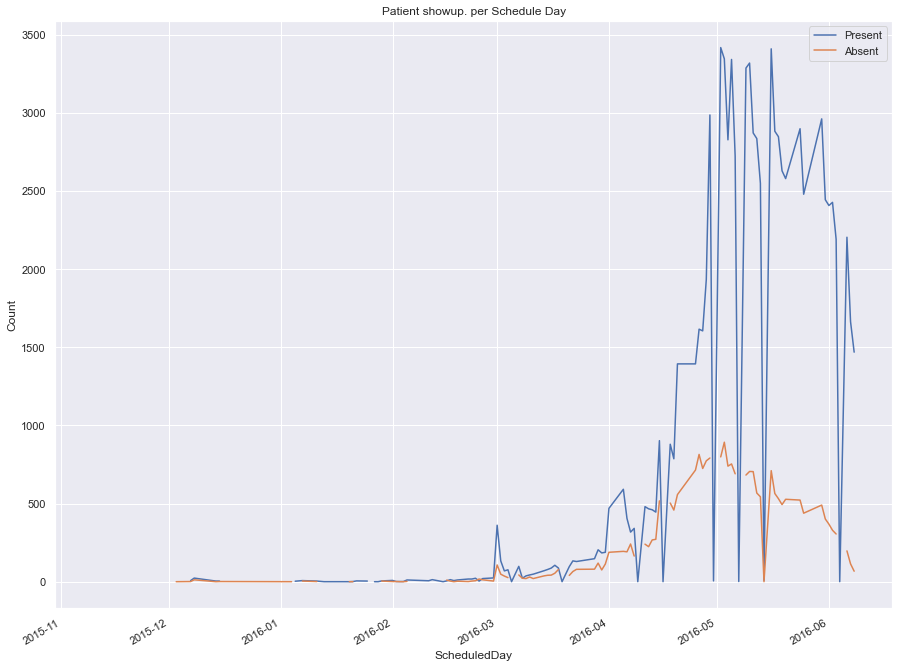

In [51]:
df1.plot(kind = 'line',  figsize = (15,12))
plt.title('Patient showup. per Schedule Day')
plt.legend(['Present','Absent'])
plt.ylabel('Count')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relationship Between Appointment Date and Shedule Date')

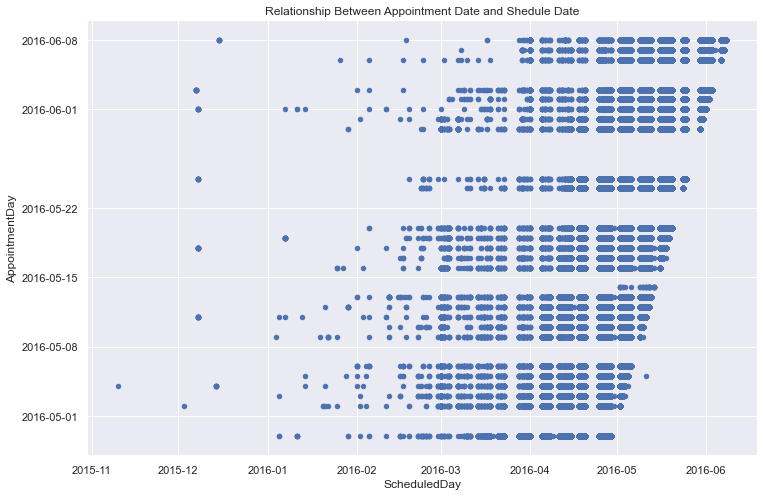

In [52]:
#Relationship between Appointment Date and Schedule Date
df.plot(kind = 'scatter', x = 'ScheduledDay', y ='AppointmentDay',figsize = (12,8))
plt.title('Relationship Between Appointment Date and Shedule Date')

In [53]:
df['Time_Diff'] = df['AppointmentDay']- df['ScheduledDay']
df['Time_Diff'].value_counts().sort_values(ascending = False)

0 days      38562
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
82 days         1
127 days        1
126 days        1
151 days        1
123 days        1
Name: Time_Diff, Length: 131, dtype: int64

In [54]:

df['Time_Diff'].describe()

count                        110526
mean     10 days 04:24:39.789370826
std      15 days 06:07:14.979140739
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: Time_Diff, dtype: object

In [55]:
percent('Time_Diff')


0 days      35.0
2 days       6.0
4 days       5.0
1 days       5.0
7 days       4.0
            ... 
82 days      0.0
127 days     0.0
126 days     0.0
151 days     0.0
123 days     0.0
Name: Time_Diff, Length: 131, dtype: float64

In [56]:
df1 = df.groupby('Time_Diff')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1

No-show,No,Yes
Time_Diff,,
0 days,36770.0,1792.0
2 days,5123.0,1602.0
1 days,4100.0,1113.0
4 days,4059.0,1231.0
7 days,3597.0,1309.0
...,...,...
126 days,NaN,1.0
132 days,NaN,1.0
139 days,NaN,1.0


In [57]:
Time_Diff_percent = round(df1['No'].value_counts()/len(df1)*100)
Time_Diff_percent

1.0      5.0
2.0      5.0
4.0      5.0
5.0      4.0
3.0      3.0
        ... 
546.0    1.0
604.0    1.0
675.0    1.0
681.0    1.0
141.0    1.0
Name: No, Length: 89, dtype: float64

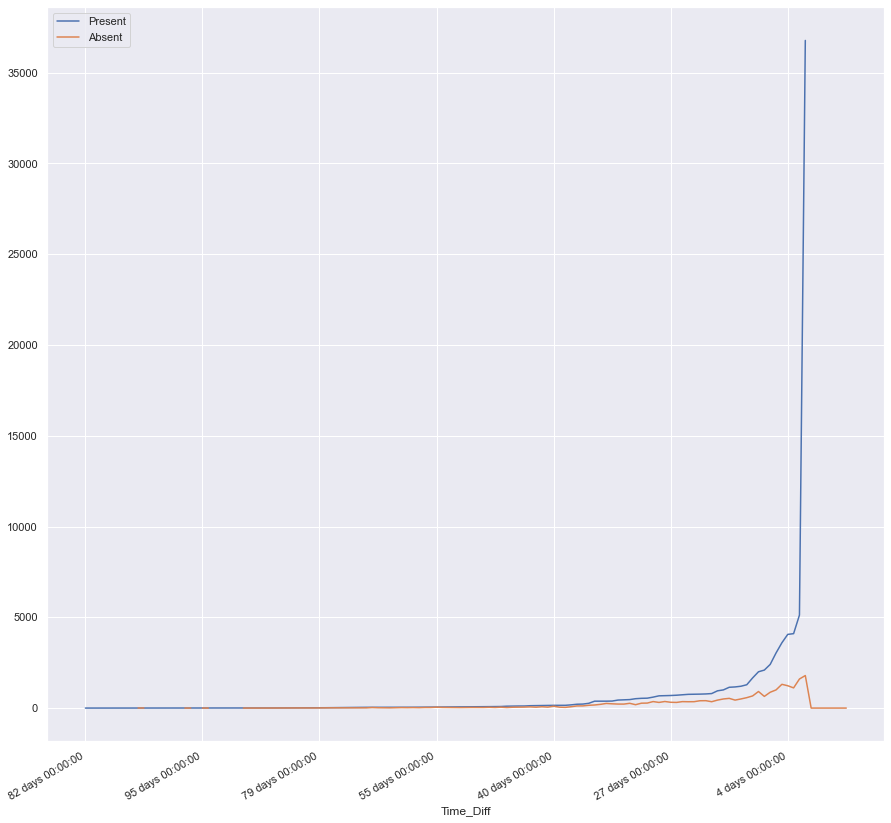

In [58]:
df1 = df.groupby('Time_Diff')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = True)
df1.plot(figsize = (15,15))
plt.legend(['Present','Absent'])

The chart above shows that there is a direct relationship between waiting time and patients ability to show up. Majority of patient called in on the 3rd of May 2016 while majority of appointment was fixed on the 16th of May 2016. Analyzing the difference between schedule and appointment shows that 25 percentile had sameday call up while some patient had to wait has long as 179days after scheduling an appointment. It can be observed that does with shorter waiting time show up more than those with longer waiting time.

### Is there any relationship between patient age and their ability to show up?

In [59]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [60]:
###break age into groups
age_group= [0,20,40,60,80,100,120]
df['age_group'] = pd.cut(df['Age'],bins = age_group)
age_group_count = df.groupby('age_group')['No-show'].value_counts()

In [61]:
df['age_group'].value_counts().sort_values(ascending = False)

(40, 60]      30081
(20, 40]      28835
(0, 20]       28309
(60, 80]      16910
(80, 100]      2845
(100, 120]        7
Name: age_group, dtype: int64

In [62]:
(df['age_group'].value_counts().sort_values(ascending = False))/len(df)*100

(40, 60]      27.216221
(20, 40]      26.088884
(0, 20]       25.612978
(60, 80]      15.299568
(80, 100]      2.574055
(100, 120]     0.006333
Name: age_group, dtype: float64

In [63]:
age_group_count

age_group   No-show
(0, 20]     No         21852
            Yes         6457
(20, 40]    No         22209
            Yes         6626
(40, 60]    No         24490
            Yes         5591
(60, 80]    No         14373
            Yes         2537
(80, 100]   No          2379
            Yes          466
(100, 120]  No             4
            Yes            3
Name: No-show, dtype: int64

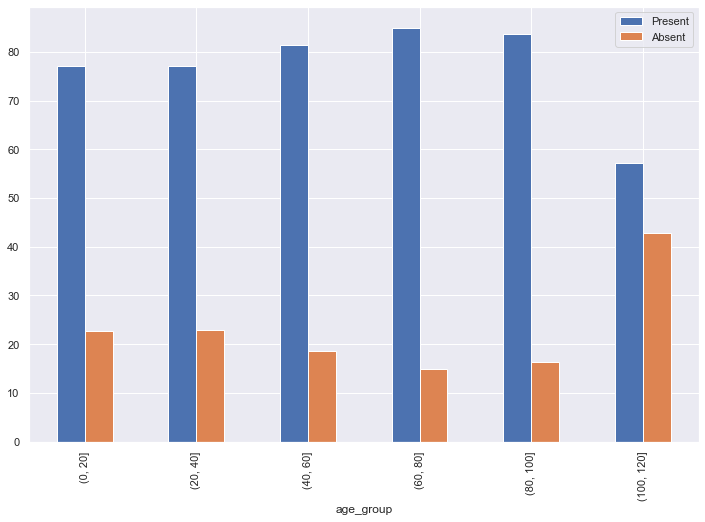

In [64]:
(age_group_count/age_group_count.groupby(level = 0).sum()*100).unstack().plot(kind = 'bar', figsize = (12,8))
plt.legend(['Present','Absent'])

Text(0.5, 0, 'Age')

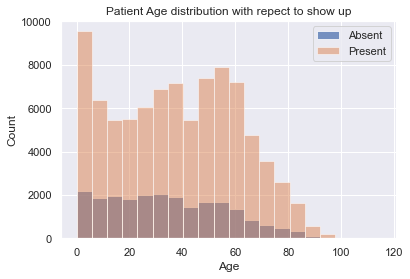

In [65]:
present = df['No-show'] == 'Yes'
absent = df['No-show'] == 'No'
df[present].Age.hist(alpha = 0.75, bins = 20)
df[absent].Age.hist(alpha = 0.5, bins = 20)
plt.title('Patient Age distribution with repect to show up')
plt.legend(['Absent','Present'])
plt.ylabel('Count')
plt.xlabel('Age')

Patient population between 40 and 60 years old make 27% of the total age group while people above 100years  makes less than 1% of the population. comparing age group with ability to show up, its noticed that people between age 20-40 show up more for their appointment as well as people above 100, this could be because they are more health conscious and are constantly engaged in activities that requires frequent hospital check up. This group makes up about 26% of the total age population. There is no clear correlation between patient age and their ability to show up.

### Does gender play any role in patient missing their appointment?

In [66]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Patient gender distribution')

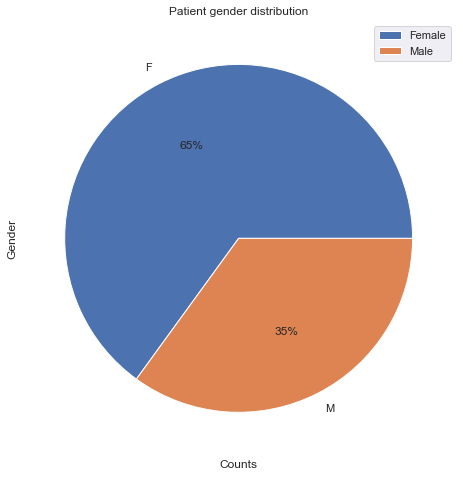

In [67]:
gender_percent = round(df['Gender'].value_counts()/len(df)*100)
gender_percent.plot(kind = 'pie',figsize = (12,8),autopct = '%1.0f%%') 
plt.legend(['Female','Male'])
plt.xlabel('Counts')
plt.title('Patient gender distribution')

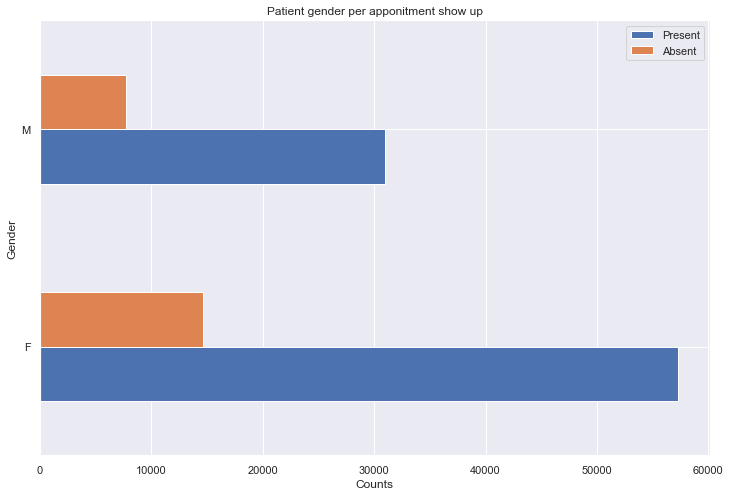

In [68]:
df1 = df.groupby('Gender')['No-show'].value_counts().unstack()
df1.plot(kind = 'barh',figsize= (12,8))
plt.xlabel('Counts')
plt.title('Patient gender per apponitment show up')
plt.legend(['Present','Absent'])

In [69]:
round((df.groupby('Gender')['No-show'].value_counts())/len(df)*100)

Gender  No-show
F       No         52.0
        Yes        13.0
M       No         28.0
        Yes         7.0
Name: No-show, dtype: float64

Text(0.5, 1.0, 'Female and Male percentage per show up')

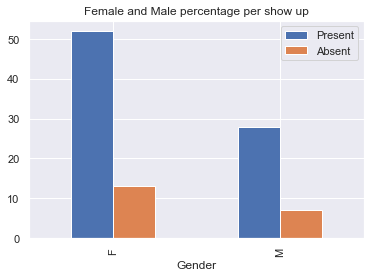

In [70]:
round((df.groupby('Gender')['No-show'].value_counts().unstack())/len(df)*100).plot(kind = 'bar')
plt.legend(['Present','Absent'])
plt.title('Female and Male percentage per show up')

Females makes 65% of the total population and are more likely to show up for appointments compared to their male counterparts. This can be due to the fact that females are expected to be more homely and sensitive to health issues than males. The data shows that there is direct correlation between patients gender and their ability to show us as 52% of the largest gender population shows up for appointment.

<a id='conclusions'></a>
## Conclusions


1. 20% of the total populations dont show up for appointments
2. Scholarship has no impact on people's ability to show up for their appointments , this can be an indication that medical fees is fairly affordable.
3. Sms alert has little to no impact of patients abilty to show up as patients who didn’t receive SMS had more chance of showing up.
4. Patient with shorter waiting time tend to show-up more than does with longer waiting time. This implies that as the wait time increases probability of show up reduces. 
5. Females are more health concious than Males as they tend to show up on their appointment days.
6. Patient Age has a direct relationship on their ability to show up.

### Limitations

1. Data collection time is a bit too small to make predictions as regards patients no-show up factor(Data is only for 2months) 
2. information on proximity of each neighbourhood will be very useful in determining how patient from each neighbourhood show up for their appointments.
3. More informations needs to be provided on major sickness/ diseases types that prompt patients to book appointments 